# Homework project for the "Differential Equations" course module

1. Solve the wave equation `dt^2 u(t,x) = dx^2 u(t,x)` numerically. Use a `1+1`-dimensional domain, and use Dirichlet boundary conditions `u(t,-L) = u(t,+L) = 0`. Use the spatial domain bounds `[-1; +1]`, and use the Gaussian-like function `f(t,x) = A exp(-1/2 sin(2pi (x-t))^2 / W^2)` as initial condition. Use `L=1, A=1, W=0.2` as parameters. Evolve from `t=0` to `t=4L`, i.e. for two crossing times. Plot the result.

### Step 1: set up wave equation over 2d domain. The domain is a spacetime grid. 

In [108]:
# Define two grid functions `t`, `x` holding the coordinates
function coords(nn, ni, dt, dx)
    t = [n * dt for i in 0:ni, n in 0:nn] # n evolves time, i evolve space
    x = [i * dx for i in 0:ni, n in 0:nn]
    return t, x
end
# x and t are both two-dimensional arrays

coords (generic function with 2 methods)

In [109]:
A = 1
W = 0.2
# Define initial conditions for a standing wave
function standing(t, x)
    ni, nn = size(t)
    u = zeros(ni, nn) # set up the correct dimension for the function, which gives a value at some space and time
    
    # Initial condition for the first point in time.
    for n in 1:2, i in 1:ni  # since it's a second order differential equation, need 2 initial conditions, which are values of the function at all positions for the first two time steps. 
        u[i, n] = A * exp.(-1/2 * sin.(2π*(x[i,n]-t[i,n])).^2/ W^2)
    end
    return u
end


standing (generic function with 1 method)

In [30]:
# Find the solution at one interior point `u[i,n]`
function evolve_point!(u, dt, dx, n, i)
    ni, nn = size(u)
    # Finite difference for second derivative in x direction at point [i,n-1]
    uxx = (u[i-1,n-1] - 2*u[i,n-1] + u[i+1,n-1]) / dx^2
    # Time derivative
    # utt = (u[i,n-2] - 2*u[i,n-1] + u[i,n]) / dt^2
    # Wave equation
    # utt = uxx
    # Solve for u[i,n]
    u[i,n] = uxx * dt^2 - u[i,n-2] + 2*u[i,n-1]
    return
end


# Find the solution for one point in time `n`
function evolve_step!(u, dt, dx, n)
    ni, nn = size(u)
    # Apply boundary condition at left boundary
    u[1,n] = 0
    # Evolve interior
    for i in 2:ni-1
        evolve_point!(u, dt, dx, n, i)
    end
    # Apply boundary condition at right boundary
    u[ni,n] = 0
    return
end


# Find the solution everywhere
function evolve!(u, dt, dx)
    ni, nn = size(u)
    # Loop over all times
    for n in 3:nn
        evolve_step!(u, dt, dx, n)
    end
    return
end




evolve! (generic function with 1 method)

In [37]:
using CairoMakie

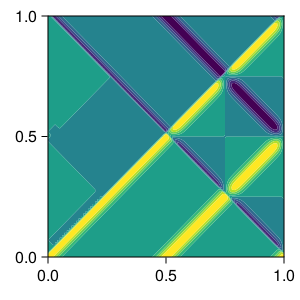

In [102]:
nn = 100
ni = 100
dt = 1 / (nn)
dx = 1 / (ni)
t, x = coords(nn, ni, dt, dx); # get two set of coordinates

# set parameters in the initial condition wave function
A = 1
W = 0.2
# given the coordinates and the initial condition functions, find the standing wave, which is now only wave at first two time steps, and all zeros at other times
u = standing(t,x) 
evolve!(u, dt, dx)

fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(u))
fig

We observe that the wave evolves through time and bounces back from the boundary because of the Dirichlet boundary condition. (Code is adapted from WaveEquation notebook used in Numerical Methods lecture 230202. )

2. Vary the time step size `dt`. If you choose `dt` too large, the discrete system will be unstable. What is the stability limit? Why does this happen? How could you avoid this limit?

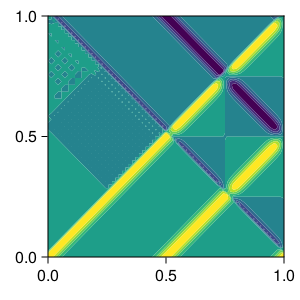

In [64]:
# suppose we change dt and dx from 1/100 to 1/70
nn = 70
ni = 70
dt = 1 / (nn)
dx = 1 / (ni)
t, x = coords(nn, ni, dt, dx); # get two set of coordinates

# set parameters in the initial condition wave function
A = 1
W = 0.2
# given the coordinates and the initial condition functions, find the standing wave, which is now only wave at first two time steps, and all zeros at other times
u = standing(t,x) 
evolve!(u, dt, dx)

fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(u))
fig

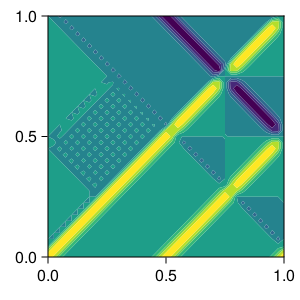

In [103]:
# suppose we change dt and dx from 1/40
nn = 40
ni = 40
dt = 1 / (nn)
dx = 1 / (ni)
t, x = coords(nn, ni, dt, dx); # get two set of coordinates

# set parameters in the initial condition wave function
A = 1
W = 0.2
# given the coordinates and the initial condition functions, find the standing wave, which is now only wave at first two time steps, and all zeros at other times
u = standing(t,x) 
evolve!(u, dt, dx)

fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(u))
fig

Once dt and dx becomes 1/70, some parts of the wave becomes unstable. Around 1/40, the waves are almost completely out of shape. 

3. The energy density of a scalar wave is `epsilon(t,x) = 1/2 ((d/dt u(t,x))^2 + ((d/dx u(t,x))^2)`. Calculate the energy density as a function of space and time for your solution. Plot the result.

In [104]:
function energy_density(u, dx, dt)

    ni, nn = size(u)
    
    # time derivative at each point
    u_dt = zeros(ni, nn)
    for i in 1:ni
        
        u_dt[i,1] = (u[i,2] - u[i,1]) / dt 
        
        for n in 2:nn-1
            u_dt[i,n] = (u[i,n+1] - 2*u[i,n] + u[i,n-1]) / dt^2 
        end
        
        u_dt[i,nn] =  (u[i,nn] - u[i,nn-1]) / dt 
        
    end
    
    # derivative wrt x at each point
    u_dx = zeros(ni,nn)
    for n in 1:nn
        
        u_dt[1,n] = (u[2,n] - u[1,n]) / dx 
        
        for i in 2:ni-1
            u_dt[i,n] = (u[i+1,n] - 2*u[i,n] + u[i-1,n]) / dx^2 
        end        
        
        u_dt[ni,n] =  (u[ni,n] - u[ni-1,n]) / dx 
        
    end
    
    #  energy density
    epsilon = 1/2 * (u_dt.^2 .+ u_dx.^2) 
    
    return epsilon./sum(epsilon) # return normalized energy density
end

energy_density (generic function with 1 method)

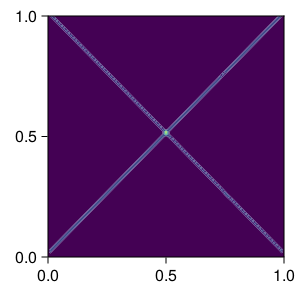

In [105]:
# set parameters
nn = 100
ni = 100
dt = 1 / (nn)
dx = 1 / (ni)
t, x = coords(nn, ni, dt, dx)

# initial condition wave function
A = 1
W = 0.2

u = standing(t, x) 
evolve!(u, dt, dx)

# calculate and plot the energy density
eps = energy_density(u, dx, dt)
fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
ctf = contourf!(vec(x), vec(t), vec(eps))
fig
     

4. To calculate the total energy `E(t)` as a function of time, you need to integrate it over space. One way to do so is using the function below. Calculate and show the total energy `E(t)` as a function of time. How well is the energy conserved? How does this depend on the grid spacings `dx` and `dt`?

In [116]:
# Integrate `epsilon` over space
function integrate(epsilon, n, dx) ### n is time
    ni, nt = size(epsilon) ### epsilon is a 2d array, the energy density over space and time
    # The boundary points are special; they have a weight of 1/2.
    # There are `ni` points overall, and the grid spacing is `dx = 2L/(ni-1)`.
    # Integrating the constant function `epsilon=1` thus gives exactly `2L`.
    E = epsilon[1, n] / 2
    for i in 2:ni-1
        E += epsilon[i, n]
    end
    E += epsilon[ni, n] / 2
    # Scale by the grid spacing
    E *= dx
    return E
end

integrate (generic function with 1 method)

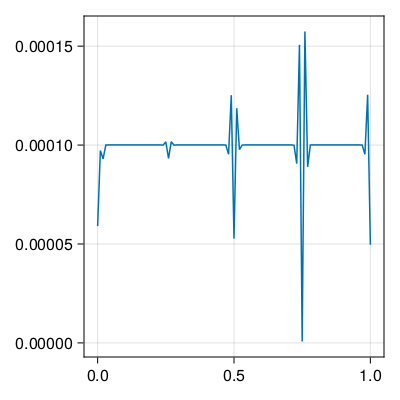

In [126]:
# set parameters
nn = 100
ni = 100
dt = 1 / (nn)
dx = 1 / (ni)
t, x = coords(nn, ni, dt, dx)

# initialize and evolve the waves
u = standing(t, x) 
evolve!(u, dt, dx)

# calculate and plot the energy density
eps = energy_density(u, dx, dt)

# calculate E for each time
ni, nt = size(u)
E_t = zeros(nt)
for n in 1:nt
    E_t[n] = integrate(eps, n, dx)
end

# plot energy against time
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1, 1])

lines!(t[1,1:end], vec(E_t))
fig

Now we experiment changing dt and dx from 1/100 to 1/50.

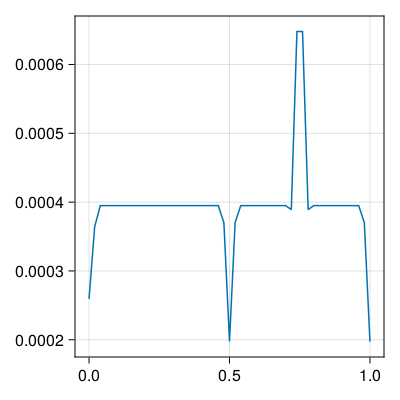

In [127]:
# set parameters
nn = 50
ni = 50
dt = 1 / (nn)
dx = 1 / (ni)
t, x = coords(nn, ni, dt, dx)

# initialize and evolve the waves
u = standing(t, x) 
evolve!(u, dt, dx)

# calculate and plot the energy density
eps = energy_density(u, dx, dt)

# calculate E for each time
ni, nt = size(u)
E_t = zeros(nt)
for n in 1:nt
    E_t[n] = integrate(eps, n, dx)
end

# plot energy against time
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1, 1])

lines!(t[1,1:end], vec(E_t))
fig

One thing we notice is that when we change dt and dx, we lose small perturbations inside each major perturbation of energies, the simulation becomes more coarse grained. 
Overall, energy is conserved around some fixed value regardless of the dt and dx that we choose. 

Acknowledgement: I thank Sercan for much help during my process of working on this project.